In [163]:
import numpy as np, sympy as sp
from IPython.display import display, Math
def pprint(x):
    display(Math(sp.latex(x)))

In [2]:
theta, r = sp.symbols('theta r')

# solution with constant C

In [3]:
#P0 = (2/3rho0vc^2)
F = sp.Function('F')(theta)
C = sp.symbols('C')
f_P   = (3/4)*sp.integrate(2*F**2*sp.sin(theta)*sp.cos(theta),theta)+C
f_rho = 7/3*f_P + sp.sin(theta)**2*F**2
f_T   = f_P - f_rho
f_K   = f_P - 5/3*f_rho

In [4]:
l = 0.5
f_vr = f_rho-(1+l)*f_T+2*f_K

In [5]:
tmp = 2*(f_rho+f_vr)
D = sp.symbols('D')
f_vtheta = sp.sin(theta)**-1 * (sp.integrate(sp.sin(theta)*tmp,theta)+D)

In [6]:
x = sp.cos(theta)
L0 = 1
L2 = 0.5   * (3*x**2-1)
L4 = 0.125 * (35*x**4-30*x**2+3)
f_L2,f_L4 = sp.symbols('f_L2 f_L4')

## solution for F=1 (0th Legendre polynomial)

In [178]:
F_expr = L0#+f_L2*L2#+f_L4*L4
#verify D=0
print(sp.simplify(f_vtheta.subs(F,F_expr).subs(theta,sp.pi/2)))
f_vtheta_D0 = f_vtheta.subs(D,0)

1.0*D


In [179]:
f_vtheta_F1 = sp.simplify(f_vtheta_D0.subs(F,F_expr))
expr = (f_vtheta_F1*sp.sin(theta)).subs(theta,0)
#verify = coefficient of C is 16/9
pprint(9*expr)
C_res= -(expr/(-16/9)-C)

<IPython.core.display.Math object>

In [180]:
for f in f_P,f_rho,f_T,f_vr,f_vtheta_D0:
    xx = [k for k, v in locals().items() if v == f][0]
    xxx = xx.split('_')[0] + '_{%s}'%(xx.split('_')[1])
    display(Math(r'%s='%xxx + sp.latex(sp.trigsimp(sp.simplify(f.subs(F,F_expr).subs(C,C_res))))))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## solution for F=sin^n(theta)

In [231]:
for n_val in range(0,10):
    print('======n=%d'%n_val)
    F_expr = sp.sin(theta)**n_val#2/3*L0-2/3*L2#+f_L4*L4
    display(Math(r'F(\theta)=' + sp.latex((F_expr))))
    f_vtheta_F1 = sp.simplify(f_vtheta_D0.subs(F,F_expr))
    #calculate C
    expr = (f_vtheta_F1*sp.sin(theta)).subs(theta,0)
    C_res= -(expr/(-16/9)-C)
    ##verify  coefficient of C is 16/9
    ##pprint(9*expr)    #should be -16C term    
    ##verify D=0
    ##pprint(sp.simplify(f_vtheta.subs(F,F_expr).subs(theta,sp.pi/2))) #should only be 1D term
    f_vtheta_D0 = f_vtheta.subs(D,0)
    for f in (f_P,f_rho,f_T,f_vr,f_vtheta_D0)[:-1]:
        if n_val>3 and f in (f_rho,f_vr): continue
        new_expr = sp.trigsimp(sp.simplify(f.subs(F,F_expr).subs(C,C_res)))
        xx = [k for k, v in locals().items() if v == f][0]
        xxx = xx.split('_')[0] + '_{%s}'%(xx.split('_')[1])
        display(Math(
        r'%s='%xxx + sp.latex(new_expr)+',\ \ '+
                     sp.latex(sp.Rational(new_expr.args[1].args[0]).limit_denominator(10**12))+',\ \ '+
                     sp.latex(sp.Rational(new_expr.args[0]).limit_denominator(10**12))
        ))

======n=0


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

======n=1


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

======n=2


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

======n=3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

======n=4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

======n=5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

======n=6


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

======n=7


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

======n=8


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

======n=9


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# solution for C dependent on r and F=1

In [117]:
C = sp.Function('C')(r)
D = sp.Function('D')(r)
f_P   = (3/4)*sp.integrate(2*sp.sin(theta)*sp.cos(theta),theta)+C
f_rho = 7/3*f_P + sp.sin(theta)**2 - 2/3*sp.diff(C,r)
f_T   = f_P - f_rho
f_K   = f_P - 5/3*f_rho

C + 0.75*sin(theta)**2

In [118]:
f_vr = f_rho-(1+l)*f_T+(2-sp.diff(f_K,r))*f_K

In [121]:
tmp = 2*(f_rho+f_vr) - sp.diff(f_rho,r) - sp.diff(f_vr,r)
f_vtheta = sp.sin(theta)**-1 * (sp.integrate(tmp*sp.sin(theta),theta)+D)
#verify D=0
print(sp.simplify(f_vtheta.subs(F,F_expr).subs(theta,sp.pi/2)))
f_vtheta_D0 = f_vtheta.subs(D,0)

D(r)


In [124]:
#expression for C
sp.cancel(sp.simplify((f_vtheta_D0*sp.sin(theta)).subs(theta,0)))

16.6913580246914*C(r)*Derivative(C(r), r) - 14.7654320987654*C(r)*Derivative(C(r), (r, 2)) + 3.20987654320988*C(r)*Derivative(C(r), (r, 3)) - 1.77777777777778*C(r) - 14.7654320987654*Derivative(C(r), r)**2 + 12.0987654320988*Derivative(C(r), r)*Derivative(C(r), (r, 2)) - 1.23456790123457*Derivative(C(r), r)*Derivative(C(r), (r, 3)) + 15.8765432098765*Derivative(C(r), r) - 1.23456790123457*Derivative(C(r), (r, 2))**2 - 13.1728395061728*Derivative(C(r), (r, 2)) + 2.83950617283951*Derivative(C(r), (r, 3)) - 1.11111111111111

In [142]:
#verify for C=constant we get previous result
Cstar = sp.symbols('C')
expr = sp.cancel(sp.simplify((f_vtheta_D0*sp.sin(theta)).subs(theta,0).subs(C,Cstar)))
C_res= -(expr/(-16/9)-Cstar)
f_P.subs(C,C_res)

-4.44089209850063e-16*C + 0.75*sin(theta)**2 - 0.624999999999999

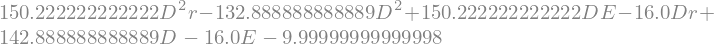

In [96]:
D,E = symbols('D E')
sympy.simplify(9*f_vtheta.subs(C(r),D*r+E)).subs(theta,0)

# solutions for non-isothermal profile and F=1 (not done)

In [ ]:
2.0e6*0.9

In [ ]:
# vc \propto r^m
# nH \propto r^-1.5+m
# mach \propto r^-0.5-2m
# A = 0.9(1-2m)
# B = tflow/tcool = 1+(4/3)m
# T = 1.8e6 A^-1 vc_200^2
# nH = 0.8e-3 r_10^(-1.5+m) vc_200 Mdot_1^0.5Lambda^-0.5_-22

In [235]:
0.8*(1/0.9)**-0.5

In [234]:
#P0 = (2/3rho0vc^2)
C = sp.symbols('C')
f_P   = (3/4)*sp.integrate(2*sp.sin(theta)*sp.cos(theta),theta)+C
f_rho = 7/3*f_P + sp.sin(theta)**2
f_T   = f_P - f_rho
f_K   = f_P - 5/3*f_rho

In [4]:
l = 0.5
f_vr = f_rho-(1+l)*f_T+2*f_K

In [5]:
tmp = 2*(f_rho+f_vr)
D = sp.symbols('D')
f_vtheta = sp.sin(theta)**-1 * (sp.integrate(sp.sin(theta)*tmp,theta)+D)

In [178]:
F_expr = L0#+f_L2*L2#+f_L4*L4
#verify D=0
print(sp.simplify(f_vtheta.subs(F,F_expr).subs(theta,sp.pi/2)))
f_vtheta_D0 = f_vtheta.subs(D,0)

1.0*D


In [179]:
f_vtheta_F1 = sp.simplify(f_vtheta_D0.subs(F,F_expr))
expr = (f_vtheta_F1*sp.sin(theta)).subs(theta,0)
#verify = coefficient of C is 16/9
pprint(9*expr)
C_res= -(expr/(-16/9)-C)

<IPython.core.display.Math object>

In [180]:
for f in f_P,f_rho,f_T,f_vr,f_vtheta_D0:
    xx = [k for k, v in locals().items() if v == f][0]
    xxx = xx.split('_')[0] + '_{%s}'%(xx.split('_')[1])
    display(Math(r'%s='%xxx + sp.latex(sp.trigsimp(sp.simplify(f.subs(F,F_expr).subs(C,C_res))))))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>